In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('D:\dev\project\Football-Match-Prediction\data\processed\df_merged.csv')

In [25]:
data.describe()

,Season,Round,HomeTeam_GF,HomeTeam_Err_avg_last5,HomeTeam_Performance__PSxG_avg_last5,HomeTeam_GCA Types__Sh_avg_last5,HomeTeam_GCA Types__PassLive_avg_last5,HomeTeam_Standard__SoT%_avg_last5,HomeTeam_Performance__CS_avg_last5,HomeTeam_Standard__SoT_avg_last5,...,AwayTeam_Challenges__Lost_avg_last5,AwayTeam_Clr_avg_last5,AwayTeam_GCA Types__TO_avg_last5,AwayTeam_CurrentPoints,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
count,2760.000000,2760.000000,2760.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,...,2745.000000,2745.000000,2745.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,2020.144928,18.992754,1.454710,0.303909,1.274504,0.173859,1.453356,33.586710,1.422082,3.799302,...,9.056169,19.524888,0.158555,24.564855,8.588406,1.529348,1.604710,2.320290,10.957246,11.283333
std,2.101280,11.094177,1.245556,0.268966,0.467021,0.188238,0.892401,8.090356,1.044800,1.243404,...,2.240634,4.836626,0.200957,18.056658,7.152571,1.828217,1.855777,2.849166,11.106048,11.312210
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,9.000000,1.000000,0.200000,0.940000,0.000000,0.800000,28.105000,1.000000,3.000000,...,7.600000,16.200000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,2020.000000,19.000000,1.000000,0.200000,1.240000,0.200000,1.400000,33.310000,1.000000,3.600000,...,9.000000,19.400000,0.200000,22.000000,8.000000,1.000000,1.000000,2.000000,8.000000,8.000000
75%,2022.000000,29.000000,2.000000,0.400000,1.560000,0.200000,2.000000,38.735000,2.000000,4.400000,...,10.400000,22.800000,0.200000,36.000000,14.000000,2.000000,2.000000,4.000000,16.000000,16.000000
max,2024.000000,38.000000,8.000000,1.800000,3.280000,1.000000,5.800000,80.000000,5.000000,9.800000,...,20.400000,52.000000,1.200000,93.000000,28.000000,11.000000,12.000000,20.000000,76.000000,86.000000


In [32]:
data.dropna(inplace=True)

In [33]:
# Ensure 'Time' is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Split the data into training and validation sets
train = data[data['Time'] <= '2023-08']
valid = data[data['Time'] > '2023-08']

In [34]:
from sklearn.preprocessing import StandardScaler


y_train = train['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
y_valid = valid['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
X_train = train.drop(columns=['Time', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])
X_valid = valid.drop(columns=['Time', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [35]:
X_valid.head()

,Season,Round,HomeTeam_Err_avg_last5,HomeTeam_Performance__PSxG_avg_last5,HomeTeam_GCA Types__Sh_avg_last5,HomeTeam_GCA Types__PassLive_avg_last5,HomeTeam_Standard__SoT%_avg_last5,HomeTeam_Performance__CS_avg_last5,HomeTeam_Standard__SoT_avg_last5,HomeTeam_Standard__G/Sh_avg_last5,...,AwayTeam_Challenges__Lost_avg_last5,AwayTeam_Clr_avg_last5,AwayTeam_GCA Types__TO_avg_last5,AwayTeam_CurrentPoints,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
2280,2023,1,0.2,1.10,0.2,1.8,44.58,2.0,3.6,0.116,...,12.8,18.2,0.2,0.0,4,1,1,0,6.0,6.0
2281,2023,1,0.0,0.80,0.2,1.6,31.24,2.0,3.4,0.098,...,14.0,22.8,0.0,0.0,24,5,3,8,24.0,24.0
2282,2023,1,0.2,1.42,0.0,2.6,34.84,1.0,4.8,0.100,...,9.2,17.2,0.0,0.0,12,2,0,8,26.0,12.0
2283,2023,1,0.6,1.72,0.0,0.0,22.84,0.0,2.8,0.000,...,9.2,29.6,0.0,0.0,0,0,0,0,0.0,0.0
2284,2023,1,0.0,1.38,0.4,0.4,38.60,0.0,5.2,0.054,...,8.4,13.2,0.4,0.0,24,0,7,10,10.0,32.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# from sklearn.model_selection import cross_val_score

# models = {
#     'Logistic Regression': LogisticRegression(solver='liblinear'),
#     'Random Forest': RandomForestClassifier(),
#     'SVC': SVC()
# }

# for name, model in models.items():
#     scores = cross_val_score(model, X, y, cv=10)
#     print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

In [37]:
# One-hot encode the team names
X_train = pd.get_dummies(X_train, columns=['HomeTeam', 'AwayTeam'])
X_valid = pd.get_dummies(X_valid, columns=['HomeTeam', 'AwayTeam'])
# Align the columns of X_valid to match X_train
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       133
           1       0.39      0.12      0.18       135
           2       0.55      0.80      0.65       212

    accuracy                           0.51       480
   macro avg       0.46      0.45      0.42       480
weighted avg       0.47      0.51      0.46       480



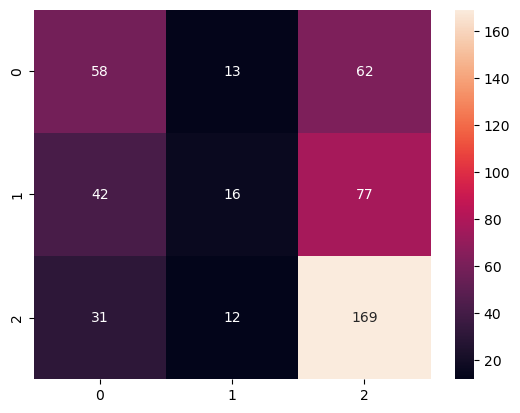

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(y_valid, y_pred), annot = True, fmt='d')
print(classification_report(y_valid, y_pred))